In [1]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file into a pandas data frame
df = pd.read_csv('adult.csv',na_values='?')
print(df.shape)

(32561, 15)


In [3]:
# Drop rows that have missing values
df1 = df.dropna()
print(df1.shape)

df1 = df1.drop(['native.country'], axis=1)
df1 = df1.drop(['education'], axis=1)
df1 = df1.drop(['fnlwgt'], axis=1)

print(df1.shape)

(30162, 15)
(30162, 12)


In [4]:
# Display the first six rows of the data frame after cleaning
df1.head(6)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,>50K


# Label Encoding Data

In [5]:
# Label encode categorical features
le = preprocessing.LabelEncoder()


le.fit(df1['workclass'])
le.transform(df1['workclass'])
df1.insert(1,'workclass_num',le.transform(df1['workclass']))
df1 = df1.drop(['workclass'], axis=1)

le.fit(df1['marital.status'])
le.transform(df1['marital.status'])
df1.insert(4,'marital.status_num',le.transform(df1['marital.status']))
df1 = df1.drop(['marital.status'], axis=1)

le.fit(df1['occupation'])
le.transform(df1['occupation'])
df1.insert(5,'occupation_num',le.transform(df1['occupation']))
df1 = df1.drop(['occupation'], axis=1)

le.fit(df1['relationship'])
le.transform(df1['relationship'])
df1.insert(6,'relationship_num',le.transform(df1['relationship']))
df1 = df1.drop(['relationship'], axis=1)

le.fit(df1['race'])
le.transform(df1['race'])
df1.insert(7,'race_num',le.transform(df1['race']))
df1 = df1.drop(['race'], axis=1)

le.fit(df1['sex'])
le.transform(df1['sex'])
df1.insert(8,'sex_num',le.transform(df1['sex']))
df1 = df1.drop(['sex'], axis=1)

le.fit(df1['income'])
df1['income_num'] = le.transform(df1['income'])
df1 = df1.drop(['income'], axis=1)

In [6]:
# Just take first 1k rows since dataset too big for SVM

X = df1.iloc[0:1000,0:11]
Y = df1.iloc[0:1000,-1]
display(X)
display(Y)

X_train = X[0:500]
Y_train = Y[0:500]
X_test = X[500:]
Y_test = Y[500:]

,age,workclass_num,education.num,marital.status_num,occupation_num,relationship_num,race_num,sex_num,capital.gain,capital.loss,hours.per.week
1,82,2,9,6,3,1,4,0,0,4356,18
3,54,2,4,0,6,4,4,0,0,3900,40
4,41,2,10,5,9,3,4,0,0,3900,40
5,34,2,9,0,7,4,4,0,0,3770,45
6,38,2,6,5,0,4,4,1,0,3770,40
7,74,5,16,4,9,2,4,0,0,3683,20
8,68,0,9,0,9,1,4,0,0,3683,40
10,45,2,16,0,9,4,2,0,0,3004,35
11,38,4,15,4,9,1,4,1,0,2824,45
12,52,2,13,6,7,1,4,0,0,2824,20


1       0
3       0
4       0
5       0
6       0
7       1
8       0
10      1
11      1
12      1
13      1
15      1
16      1
17      1
19      1
20      1
21      0
22      0
23      0
25      0
26      0
27      0
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
       ..
1021    0
1022    0
1023    0
1024    0
1025    0
1027    0
1028    0
1029    0
1030    0
1031    0
1032    0
1033    0
1034    0
1035    0
1036    0
1037    0
1038    0
1039    0
1040    0
1041    0
1042    0
1043    0
1044    0
1045    0
1046    0
1047    0
1048    0
1049    0
1050    0
1051    0
Name: income_num, Length: 1000, dtype: int32

# Supervised Analysis

# Support Vector Machines (SVM)

# SVM using Linear Kernel.

In [7]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [8]:
def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train,Y_train)
    
    # Print weights and intercept
    print(svc_linear.coef_)
    print(svc_linear.intercept_)

    # TODO - Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)
    

In [9]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_linear(c)

[[ 0.03766133  0.00292891  0.05795486 -0.00846606  0.01183898 -0.00245456
   0.003       0.00171857  0.         -0.00027411  0.02735143]]
[-2.54428439]
Train Accuracy = 0.730000
Test Accuracy = 0.782000
[[ 4.00875729e-02  1.69715030e-02  2.30495866e-01 -2.71837752e-02
   9.81903368e-03  3.27035793e-03  2.60000000e-02  1.31071766e-02
   0.00000000e+00  8.40475871e-06  2.64300591e-02]]
[-5.38689603]
Train Accuracy = 0.778000
Test Accuracy = 0.684000
[[ 3.12551694e-02  1.11240755e-01  3.93213999e-01 -9.91140543e-03
   5.88643931e-03  2.50005209e-02  1.30181063e-01  9.73949003e-02
   0.00000000e+00 -2.54992459e-04  3.02090121e-02]]
[-7.24950703]
Train Accuracy = 0.796000
Test Accuracy = 0.618000
[[ 3.27997071e-02  1.70920927e-01  4.32086881e-01  3.07166356e-02
   9.46489782e-03  9.69256236e-02  2.04518126e-01  4.18712927e-01
   0.00000000e+00 -1.46104209e-04  3.33724723e-02]]
[-8.91636368]
Train Accuracy = 0.800000
Test Accuracy = 0.622000
[[3.53173378e-02 1.99060682e-01 4.50507243e-01 5.8

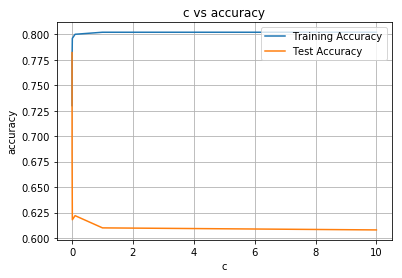

In [10]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('c vs accuracy')
plt.plot(c_svm_linear, acc_train_svm_linear)
plt.plot(c_svm_linear, acc_test_svm_linear)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# SVM using Radial Basis Function(RBF) Kernel.

In [11]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

# Reset train/test
X_train = X[0:500]
Y_train = Y[0:500]
X_test = X[500:]
Y_test = Y[500:]

In [12]:
def svm_rbf(c):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train,Y_train)
    
    # Find support vectors, weights, intercept
    print(svc_rbf.n_support_)
    print(svc_rbf.support_vectors_)
    print(svc_rbf.dual_coef_)
    print(svc_rbf.intercept_)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train,Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test,Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [13]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_rbf(c)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

[207 207]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [5.400e+01 2.000e+00 4.000e+00 ... 0.000e+00 3.900e+03 4.000e+01]
 [4.100e+01 2.000e+00 1.000e+01 ... 0.000e+00 3.900e+03 4.000e+01]
 ...
 [4.000e+01 2.000e+00 1.600e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [4.800e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [4.700e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.902e+03 6.000e+01]]
[[-0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001
  -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.0001 -0.000

Test Accuracy = 0.780000
[207 278]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [5.400e+01 2.000e+00 4.000e+00 ... 0.000e+00 3.900e+03 4.000e+01]
 [4.100e+01 2.000e+00 1.000e+01 ... 0.000e+00 3.900e+03 4.000e+01]
 ...
 [4.800e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [3.600e+01 2.000e+00 1.300e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [4.700e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.902e+03 6.000e+01]]
[[-0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1        -0.1        -0.1        -0.1        -0.1
  -0.1        -0.1   

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy = 0.780000
[206 278]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [5.400e+01 2.000e+00 4.000e+00 ... 0.000e+00 3.900e+03 4.000e+01]
 [4.100e+01 2.000e+00 1.000e+01 ... 0.000e+00 3.900e+03 4.000e+01]
 ...
 [4.300e+01 2.000e+00 1.300e+01 ... 0.000e+00 1.977e+03 5.000e+01]
 [3.600e+01 2.000e+00 1.300e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [4.700e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.902e+03 6.000e+01]]
[[-1.08328098 -1.08383155 -1.08353349 -1.08390384 -1.0835193  -1.08354038
  -1.08363723 -1.0835764  -1.08353117 -1.08358947 -1.08353807 -1.083528
  -1.0835846  -1.08364204 -1.06416482 -1.08335117 -1.08382743 -0.61619516
  -1.08329118 -1.08387215 -1.08327484 -1.06432147 -0.61404115 -1.08353769
  -1.08349877 -1.08290547 -1.08350664 -1.06251393 -1.07633494 -1.07980474
  -1.08325309 -1.06213057 -1.06182837 -1.08210115 -1.08355246 -0.99740451
  -0.99818877 -1.06137885 -1.08314253 -1.07972728 -1.07944671 -1.08334652
  -1.00528155 -1.08389976 -1.0833513  -1.

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


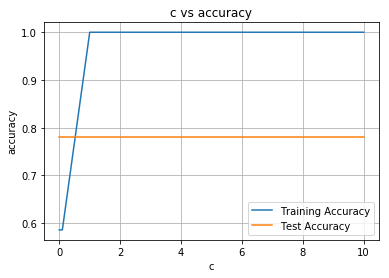

In [14]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('c vs accuracy')
plt.plot(c_svm_rbf, acc_train_svm_rbf)
plt.plot(c_svm_rbf, acc_test_svm_rbf)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# SVM using Polynomial Kernel.

In [15]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

# Reset train/test
X_train = X[0:500]
Y_train = Y[0:500]
X_test = X[500:]
Y_test = Y[500:]

In [16]:
def svm_polynomial(c):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train,Y_train)
    
    # Find support vectors, weights, intercept
    print(svc_polynomial.n_support_)
    print(svc_polynomial.support_vectors_)
    print(svc_polynomial.dual_coef_)
    print(svc_polynomial.intercept_)
    
    # TODO - Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train,Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test,Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
    

In [17]:
cVals = [0.000001, 0.000003, 0.000005]
for c in cVals:
    print(c)
    svm_polynomial(c)

1e-06


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[78 81]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [6.800e+01 0.000e+00 9.000e+00 ... 0.000e+00 3.683e+03 4.000e+01]
 [7.100e+01 2.000e+00 9.000e+00 ... 0.000e+00 2.467e+03 5.200e+01]
 ...
 [3.900e+01 1.000e+00 1.400e+01 ... 0.000e+00 1.977e+03 2.000e+01]
 [4.800e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [3.600e+01 2.000e+00 1.300e+01 ... 0.000e+00 1.977e+03 4.500e+01]]
[[-1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -8.69035619e-07 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.00000000e-06
  -1.07889422e-07 -8.29072291e-08 -1.00000000e-06 -1.00000000e-06
  -1.00000000e-06 -1.00000000e-06 -1.00000000e-06 -1.000

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[78 78]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [6.800e+01 0.000e+00 9.000e+00 ... 0.000e+00 3.683e+03 4.000e+01]
 [7.100e+01 2.000e+00 9.000e+00 ... 0.000e+00 2.467e+03 5.200e+01]
 ...
 [3.900e+01 1.000e+00 1.400e+01 ... 0.000e+00 1.977e+03 2.000e+01]
 [4.800e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.977e+03 4.500e+01]
 [3.600e+01 2.000e+00 1.300e+01 ... 0.000e+00 1.977e+03 4.500e+01]]
[[-3.00000000e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.00000000e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.00000000e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.00000000e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.00000000e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -2.73646588e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -2.97850912e-06 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.42560171e-07 -3.00000000e-06 -3.00000000e-06 -3.00000000e-06
  -3.00000000e-06 -3.00000000e-06 -2.85196208e-06 -3.000

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[79 82]
[[8.200e+01 2.000e+00 9.000e+00 ... 0.000e+00 4.356e+03 1.800e+01]
 [6.800e+01 0.000e+00 9.000e+00 ... 0.000e+00 3.683e+03 4.000e+01]
 [7.100e+01 2.000e+00 9.000e+00 ... 0.000e+00 2.467e+03 5.200e+01]
 ...
 [4.600e+01 2.000e+00 1.400e+01 ... 0.000e+00 1.977e+03 5.000e+01]
 [5.400e+01 2.000e+00 1.000e+01 ... 0.000e+00 1.977e+03 1.800e+01]
 [4.800e+01 2.000e+00 1.500e+01 ... 0.000e+00 1.977e+03 4.500e+01]]
[[-5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -2.20314909e-06
  -2.53127408e-06 -5.00000000e-06 -5.00000000e-06 -5.00000000e-06
  -5.00000000e-06 -5.00000000e-06 -5.00000000e-06 -3.693

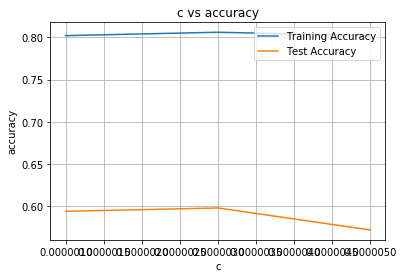

In [18]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('c vs accuracy')
plt.plot(c_svm_poly,acc_train_svm_poly)
plt.plot(c_svm_poly,acc_test_svm_poly)
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Some Neural Network Code From Lab
Using neural network lab code from: https://github.com/adventuresinML/adventures-in-ml-code/blob/master/neural_network_tutorial.py

In [10]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights

In [11]:
X = np.array(df1.iloc[:,:11])
y = np.array(df1.iloc[:,-1]).reshape(np.array(df1.iloc[:,-1]).shape[0],1)
print(X.shape)
print(y)

(30162, 11)
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [12]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

X[0,:] # Looking the new features after scaling

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 3.31662977, -0.20895464, -0.4397382 ,  2.28296868, -0.73454534,
       -0.26124893,  0.3850479 , -1.44340518, -0.14744462, 10.55581365,
       -1.91416096])

In [13]:
# Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print(X_train.shape)

(18097, 11)


In [14]:
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

In [15]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [16]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [17]:
def feed_forward(x, W, b):
    #print(x,W,b)
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [18]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [19]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
            print(W)
            print(b)
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [27]:
nn_structure = [11, 10, 1]

# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


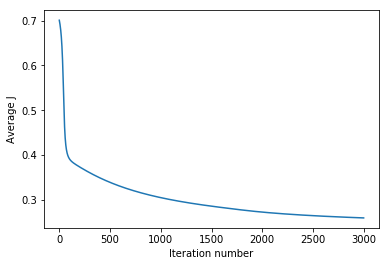

In [28]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [29]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 74.7948611686697%


In [20]:
nn_structure = [11, 6, 1]

# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
{1: array([[0.30548766, 0.10272343, 0.1124388 , 0.9112017 , 0.27211982,
        0.08475307, 0.79100223, 0.81738503, 0.87086341, 0.02617366,
        0.80326131],
       [0.32820258, 0.07827224, 0.89626736, 0.19377947, 0.27230705,
        0.33865677, 0.89907107, 0.19241834, 0.99113697, 0.91171361,
        0.27621434],
       [0.2058365 , 0.97122853, 0.76280756, 0.07377145, 0.89825104,
        0.24195521, 0.90879639, 0.30892737, 0.29010954, 0.40183458,
        0.7095567 ],
       [0.13926945, 0.085259  , 0.19928226, 0.02390296, 0.13657668,
        0.91307199, 0.8255664 , 0.4516621 , 0.49965923, 0.98152446,
        0.9158523 ],
       [0.80159794, 0.91923737, 0.30307085, 0.60871242, 0.58053782,
        0.02372574, 0.67291422, 0.7113022 , 0.24418426, 0.1852067 ,
        0.91016044],
       [0.67969916, 0.28718009, 0.5861682 , 0.19276964, 0.10396172,
        0.49915981, 0.07807795, 0.40862013, 0.55919101, 0.89897978,
        0

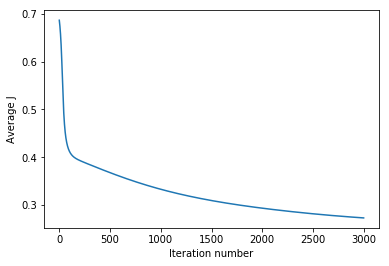

In [21]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [22]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 74.70368835474514%
